In [1]:
import numpy as np
import math
import logging
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
iris = pd.read_csv('iris.data', names = ['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm', 'class'])

In [3]:
encoding = {"class":     {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}}
iris = iris.replace(encoding)

In [4]:
iris

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
# Droping the target and species since we only need the measurements
X = iris.drop(['class'], axis=1)

# converting into numpy array
X = X.values
y = iris['class'].values

In [6]:
#Standardise. I think it is better to standardise after split
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.svm import SVC 

kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']#A function which returns the corresponding SVC model
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")
    
for i in range(4):
    # Separate data into test and training sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)# Train a SVC model using different kernal
    svclassifier = getClassifier(i) 
    svclassifier.fit(X_train, y_train)# Make prediction
    y_pred = svclassifier.predict(X_test)# Evaluate our model
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test,y_pred,target_names=['setosa', 'virginica','versicolor']))
    
#Linear and RBF look best

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

      setosa       1.00      0.89      0.94         9
   virginica       0.64      1.00      0.78         9
  versicolor       0.88      0.58      0.70        12

    accuracy                           0.80        30
   macro avg       0.84      0.82      0.81        30
weighted avg       0.84      0.80      0.80        30

Evaluation: RBF kernel
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
   virginica       0.91      0.91      0.91        11
  versicolor       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30

Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
   virginica       1.00      0.60      0.75      

In [8]:
#Hyperparamteres: kernels, C, gamma

#Grid search is commonly used as an approach to hyper-parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

param_grid = {'C': [0.01, 0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid','linear']} #Create a dictionary called param_grid and fill out some parameters for kernels, C and gamma
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2) #Create a GridSearchCV object 
grid.fit(X_train,y_train) #fit object to the training data
print(grid.best_params_) #best parameters apparently

grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))#Output

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.01, gamma=1, kernel=poly; total time=   0.0s
[CV] END .......................C=0.01, gamma=1, kernel=poly; total time=   0.0s
[CV] END .......................C=0.01, gamma=1, kernel=poly; total time=   0.0s
[CV] END .......................C=0.01, gamma=1, kernel=poly; total time=   0.0s
[CV] END .......................C=0.01, gamma=1, kernel=poly; total time=   0.0s
[CV] END ....................C=0.01, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=0.01, gamma=1, k

[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C

[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END ..................C=1000, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ..................C=1000, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ..................C=1000, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ..................C=1000, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ..................C=1000, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=1000, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................C=1000, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................

In [9]:
print(grid.best_params_)

{'C': 1000, 'gamma': 0.1, 'kernel': 'sigmoid'}


In [10]:
classifier = SVC(C=1, kernel='linear', gamma=1, probability=True)
classifier.fit(X_train, y_train)
classifier_score = classifier.score(X_test, y_test)
print('The classifier accuracy score is {:03.4f}'.format(classifier_score))

The classifier accuracy score is 0.9778


In [11]:
#https://www.kaggle.com/code/aceccon/6-iris-dataset-learning-to-tuning-parameters

from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)# Train a SVC model using different kernal

kernel_types = ["linear", "poly", "rbf", "sigmoid"]     #types of kernels to be tested
C_range = [0.01, 0.1, 1, 10, 100, 1000]                 #range of C to be tested
degree_range = [1, 2, 3, 4, 5, 6]                       #degrees to be tested
gamma = [1,0.1,0.01,0.001]

param_grid = {"kernel": kernel_types,
              "C": C_range,
              "degree": degree_range,
              "gamma" : gamma
              }         #setting grid of parameters

grid = GridSearchCV(estimator = svm.SVC(), 
                    param_grid = param_grid, 
                    cv = 5, 
                    scoring = 'accuracy', 
                    refit = True)   #setting grid with estimator

svm_model = make_pipeline(preprocessing.StandardScaler(), grid)     #creating preprocessing
svm_model.fit(X_train, y_train)       #fitting data

print("Accuracy of the tuned model: %.4f" %grid.best_score_)
print(grid.best_params_)

Accuracy of the tuned model: 0.9714
{'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'linear'}


In [12]:
#{'C': 1, 'degree': 1, 'gamma': 1, 'kernel': 'linear'} keeps coming up, with accuracy 0.98

In [13]:
#so now do this model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
classifier = SVC(C=1.0, kernel='linear', degree=1, gamma=1, probability=True)
classifier.fit(X_train, y_train)
predictions=classifier.predict(X_test)
classifier_score = classifier.score(X_test, y_test)
print('The classifier accuracy score is {:03.4f}'.format(classifier_score))

from sklearn.model_selection import cross_val_score

dict = {}
for fold in range(2,31):
    cv_error = np.average(cross_val_score(classifier, X, y, cv=fold)) 
    print(fold, cv_error)
    dict[fold]=cv_error
print(max(dict.values()))
#best k = 3

The classifier accuracy score is 0.9778
2 0.9733333333333334
3 0.98
4 0.9667496443812233
5 0.9666666666666668
6 0.9666666666666667
7 0.966604823747681
8 0.9736842105263157
9 0.9669117647058825
10 0.9666666666666668
11 0.9605394605394605
12 0.9668803418803419
13 0.9667832167832168
14 0.9675324675324675
15 0.9533333333333334
16 0.9590277777777778
17 0.9673202614379084
18 0.9591049382716049
19 0.9605263157894737
20 0.9580357142857142
21 0.9659863945578231
22 0.9545454545454546
23 0.9606625258799172
24 0.9722222222222223
25 0.9666666666666666
26 0.9679487179487178
27 0.9666666666666667
28 0.9583333333333334
29 0.9528735632183908
30 0.9599999999999999
0.98


Text(0.5, 0, 'Predicted Values')

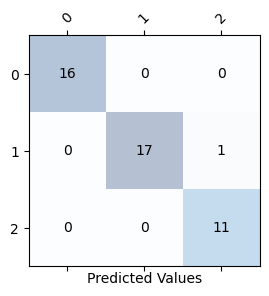

In [14]:
from sklearn.metrics import confusion_matrix, classification_report


cm = confusion_matrix(y_test, predictions)
# Plot confusion matrix, 
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
 for j in range(cm.shape[1]):
     ax.text(x=j, y=i,
         s=cm[i, j], 
         va='center', ha='center')
classes=["0","1","2"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Values', )
